## Multi-Layered Perceptron: The Regression MLP
In the last video we looked at using MLPClassifier to solve a classification problem. MLPs can be used for regression as well! In this notebook, we'll be looking at the MLP Regressor. We'll be predicting the price of secondhand toyota cars, based on a range of features such as age, mileage, transmission type, fuel type etc.

You can find more info about the MLP Regressor here:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

Regression is used to predict or estimate a value. For example, in classification problems, we predict the category of an item, e.g. poisonous or edible mushroom. In contrast, regression problems involve predicting a value as close to our target as possible, e.g. if you are predicting the value of a car, and it has a target value of $34,000, and your model predicts its value to be $32,500, you will probably be satisfied!

* You can choose to or not to include an activation function in the output layer
* Including an activation function gives you a more predictable result, e.g. using ReLU will ensure your output is never negative
* training always involves the use of a loss function

Loss functions:
Used to calculate the difference between the predicted output and the target, or desired output. Regression MLPs use the followin loss functions:
* mean squared error
* mean absolute error
* Huber Loss: combination of means squared and mean abosolute error

In [138]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

def one_hot_encode(dataframe, col_name):
    dataframe = pd.get_dummies(dataframe, columns=[col_name], prefix = [col_name], dtype=int)
    return dataframe

In [140]:
#load the dataset
data = pd.read_csv("./toyota.csv")

In [142]:
#check out its features
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [144]:
#One hot encode the categorical data
subset = one_hot_encode(data, 'transmission')
subset = one_hot_encode(subset, 'fuelType')
subset = one_hot_encode(subset, 'engineSize')
subset = one_hot_encode(subset, 'model')
subset.head()

,year,price,mileage,tax,mpg,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,...,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris
0,2016,16000,24089,265,36.2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,15995,18615,145,36.2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,13998,27469,265,36.2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,18998,14736,150,36.2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,17498,36284,145,36.2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
chosen_features = subset.filter(['year','mileage','price','transmission_Automatic','transmission_Manual','transmission_Semi-Auto','fuelType_Diesel','fuelType_Hybrid','fuelType_Petrol'])#'year',
chosen_features.head()

chosen_features = subset.drop(["tax", "mpg"], axis = 1)

In [148]:
#always remember to check for NaN values
check_NaN(chosen_features)

Total NaN: 0
NaN by column:
 year                      0
price                     0
mileage                   0
transmission_Automatic    0
transmission_Manual       0
transmission_Other        0
transmission_Semi-Auto    0
fuelType_Diesel           0
fuelType_Hybrid           0
fuelType_Other            0
fuelType_Petrol           0
engineSize_0.0            0
engineSize_1.0            0
engineSize_1.2            0
engineSize_1.3            0
engineSize_1.4            0
engineSize_1.5            0
engineSize_1.6            0
engineSize_1.8            0
engineSize_2.0            0
engineSize_2.2            0
engineSize_2.4            0
engineSize_2.5            0
engineSize_2.8            0
engineSize_3.0            0
engineSize_4.2            0
engineSize_4.5            0
model_ Auris              0
model_ Avensis            0
model_ Aygo               0
model_ C-HR               0
model_ Camry              0
model_ Corolla            0
model_ GT86               0
model_ Hilux       

In [150]:
#Create the train/test splits as we did before
x_train, x_test, y_train, y_test = train_test_split(chosen_features.drop(['price'], axis=1),chosen_features['price'],test_size=0.1)                                                                       
print("x train/test ",x_train.shape, x_test.shape)
print("y train/test ",y_train.shape, y_test.shape)

x train/test  (6064, 44) (674, 44)
y train/test  (6064,) (674,)


In [152]:
#Convert them from pandas to numpy arrays
x = x_train.values
y = y_train.values
x_t = x_test.values
y_t = y_test.values

In [179]:
#create our MLP Regressor model. We will be using 5 hidden layers, each containing 100 neurons
MLP = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100), random_state= 42)

In [181]:
#train the model
MLP.fit(x, y)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100), random_state=42)

### Evaluation
Because we have created a regression model, we are unable to find its accuracy. Instead, we'll simply find the mean squared error. 

We'll also show the coefficient of determination of the prediction. The best possible score is 1.0. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html for more info.

You can read more about the available evaluation metrics for regression (and classification) models here:
https://scikit-learn.org/stable/modules/model_evaluation.html

In [192]:
predictions = MLP.predict(x_t)
#Calculate the mean squared error
print("Mean squared error: ",np.mean((predictions - y_t) ** 2))
print("Co-efficient of determination: ",metrics.r2_score(y_t, predictions))

Mean squared error:  8553873.624630384
Co-efficient of determination:  0.804850619165655


In [196]:
test_car = [2000,300000,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1]
#'year','mileage','transmission_Automatic','transmission_Manual','transmission_Semi-Auto','fuelType_Diesel','fuelType_Hybrid','fuelType_Petrol']
prediction = MLP.predict([test_car])
print(f"The value of an automatic, petrol Toyota car manufactured in the year,{test_car[0]}, with an odometer reading of,{test_car[1]},is predicted to be $,{round(prediction[0],2) * 1.5}")

The value of an automatic, petrol Toyota car manufactured in the year,2000, with an odometer reading of,300000,is predicted to be $,7595.205


### Visualisation

In [199]:
#python slicing (this gives you the year column)
x[:,0]

array([2017, 2016, 2017, ..., 2017, 2020, 2019])

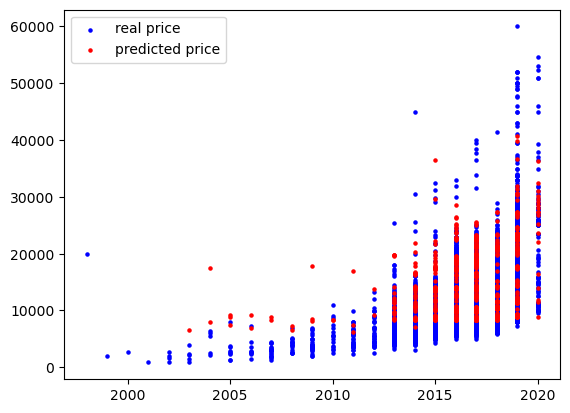

In [85]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x[:,0],y, s=5, c='b', label='real price')
ax1.scatter(x_t[:,0],predictions, s=5, c='r', marker="o", label='predicted price')

plt.legend()
plt.show()

### Exercise 1
Write a function to convert the predicted price to Australian dollars (AUD)

### Exercise 2
Change the activation function ({‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’) to see if you can get the co-efficient of determination closer to 1, and lower the mean squared error.
